## Loading Sample data

In [2]:
# # Acquring GPU
# !nvidia-smi

# import os
# HOME = os.getcwd()
# print("HOME:", HOME)



# f"{HOME}/data"

# %cd {HOME}
# !mkdir {HOME}/data
# %cd {HOME}/data

# !git clone https://github.com/devasenan134/mfs.git
# %cp mfs/inputs/inputs ./inputs -R
# %rm -rf mfs
# %cd inputs

In [5]:
!pwd

/Users/devasenan/Documents/projects/mfs/spatial layout mapping


## Dependencies

In [4]:
!pip install supervision

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import supervision as sv

## Functions

In [3]:
def get_mask_imgs(img_path):
    %cd {img_path}
    mask_imgs = []
    org_img = ""
    for img in os.listdir():
        if img.split('.')[-1] == 'png':
            mask_imgs.append(img_path+"/"+img)
        else:
            org_img = img

    mask_imgs.append(img_path+"/"+org_img)
    %cd {HOME}/data/inputs
    return mask_imgs

In [4]:
def read_imgs(imgs):
    masks = []
    for img in imgs[::-1]:
        mask = cv2.imread(img, cv2.IMREAD_UNCHANGED)
        # mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
        plt.imshow(mask)
        masks.append(mask)
    return masks[::-1]

## Process

In [16]:
def peak_point_detection(mask):
    blur_mask = cv2.blur(mask, (3, 3))
    bin_mask = cv2.threshold(blur_mask, 200, 255, cv2.THRESH_BINARY)
    print(bin_mask)

/content/data/inputs/img0
/content/data/inputs


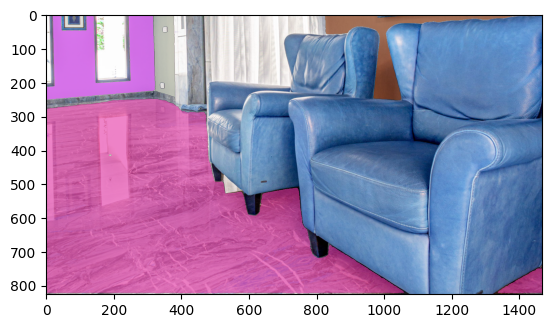

In [14]:
mask_imgs = get_mask_imgs('img0')
masks = read_imgs(mask_imgs)

In [15]:
print(masks[0])

[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 ...

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:709: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x, subok=True, copy=copy)


TypeError: ignored

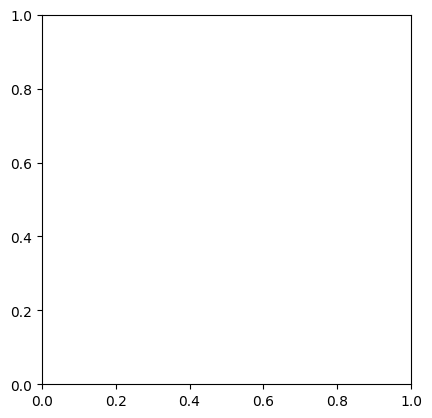

In [11]:
peak_point_detection(masks[0])